<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Attrition-Analysis" data-toc-modified-id="Introduction-to-Attrition-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Attrition Analysis</a></span><ul class="toc-item"><li><span><a href="#The-Problem" data-toc-modified-id="The-Problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Problem</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-Partitioning" data-toc-modified-id="Data-Partitioning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Partitioning</a></span></li><li><span><a href="#Data-Modeling-with-Machine-Learning" data-toc-modified-id="Data-Modeling-with-Machine-Learning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Modeling with Machine Learning</a></span><ul class="toc-item"><li><span><a href="#XGBoost-model" data-toc-modified-id="XGBoost-model-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>XGBoost model</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></li><li><span><a href="#SVM-model" data-toc-modified-id="SVM-model-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>SVM model</a></span></li><li><span><a href="#Logistic-regression-model" data-toc-modified-id="Logistic-regression-model-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Logistic regression model</a></span></li></ul></li></ul></li></ul></div>

## Introduction to Attrition Analysis
- It is often difficult for an HR department to identify which employees are most likely to leave the company and for what reasons; this project aims to give a way to leverage machine learning to better understand employees.
- In this project I have constructed a R Shiny application for this project, all of the analysis are visualized in the Shiny application.

### The Problem
- Employee attrition is the rate at which employees leave a company.
- The goal of this analysis is to model employee attrition and determine the most dominant contributing factors that govern this turnover.
- Through this kind of analysis, we can understand how many employees are likely to leave, while also determining which employees are at the highest risk and for what reasons.

### Exploratory Data Analysis
- The dataset used in this analysis is provided from IBM HR to study about employee attrition, which can be found at below link.
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

- In terms of machine learning analysis, the data needs to be initially cleaned.
- This will allow for the maximum accuracy of the final model when we start processing.

In [1]:
# Importing data
d <- read.csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [2]:
# Dropping the the columns with constant values or no variability.
library(caret)
head(d[nearZeroVar(d)])

Loading required package: lattice
Loading required package: ggplot2


EmployeeCount,Over18,StandardHours
1,Y,80
1,Y,80
1,Y,80
1,Y,80
1,Y,80
1,Y,80


- Drop Over18 as there is no variability, all are Y.
- Drop EmployeeCount as there is no variability, all are 1.
- Drop StandardHours as there is no variability, all are 80.
- Also, drop Employee Number as it is just an identifier.

In [3]:
d$Over18 <- NULL
d$EmployeeCount <- NULL
d$StandardHours <- NULL
d$EmployeeNumber <- NULL

In [4]:
# Next, change all the categorical variables to number as fllows,
sapply(d, function(x) is.factor(x))

# https://dzone.com/articles/r-filtering-data-frames-column

ï..Age                Attrition           BusinessTravel 
                   FALSE                     TRUE                     TRUE 
               DailyRate               Department         DistanceFromHome 
                   FALSE                     TRUE                    FALSE 
               Education           EducationField  EnvironmentSatisfaction 
                   FALSE                     TRUE                    FALSE 
                  Gender               HourlyRate           JobInvolvement 
                    TRUE                    FALSE                    FALSE 
                JobLevel                  JobRole          JobSatisfaction 
                   FALSE                     TRUE                    FALSE 
           MaritalStatus            MonthlyIncome              MonthlyRate 
                    TRUE                    FALSE                    FALSE 
      NumCompaniesWorked                 OverTime        PercentSalaryHike 
                   FALSE                     TRUE                    FALSE 
       PerformanceRating RelationshipSatisfaction         StockOptionLevel 
                   FALSE                    FALSE                    FALSE 
       TotalWorkingYears    TrainingTimesLastYear          WorkLifeBalance 
                   FALSE                    FALSE                    FALSE 
          YearsAtCompany       YearsInCurrentRole  YearsSinceLastPromotion 
                   FALSE                    FALSE                    FALSE 
    YearsWithCurrManager 
                   FALSE

In [5]:
d$Attrition <- as.integer(as.factor(d$Attrition)) - 1 # Subtracting 1 from converted value as Yes = 2 and No = 1
d$BusinessTravel <- as.integer(as.factor(d$BusinessTravel))
d$Department <- as.integer(as.factor(d$Department))
d$EducationField <- as.integer(as.factor(d$EducationField))
d$Gender <- as.integer(as.factor(d$Gender))
d$JobRole <- as.integer(as.factor(d$JobRole))
d$MaritalStatus <- as.integer(as.factor(d$MaritalStatus)) 
d$OverTime <- as.integer(as.factor(d$OverTime))

- The correlation matrix is used to illustrate the relations between every variable. The code is shown as following,

corrplot 0.84 loaded


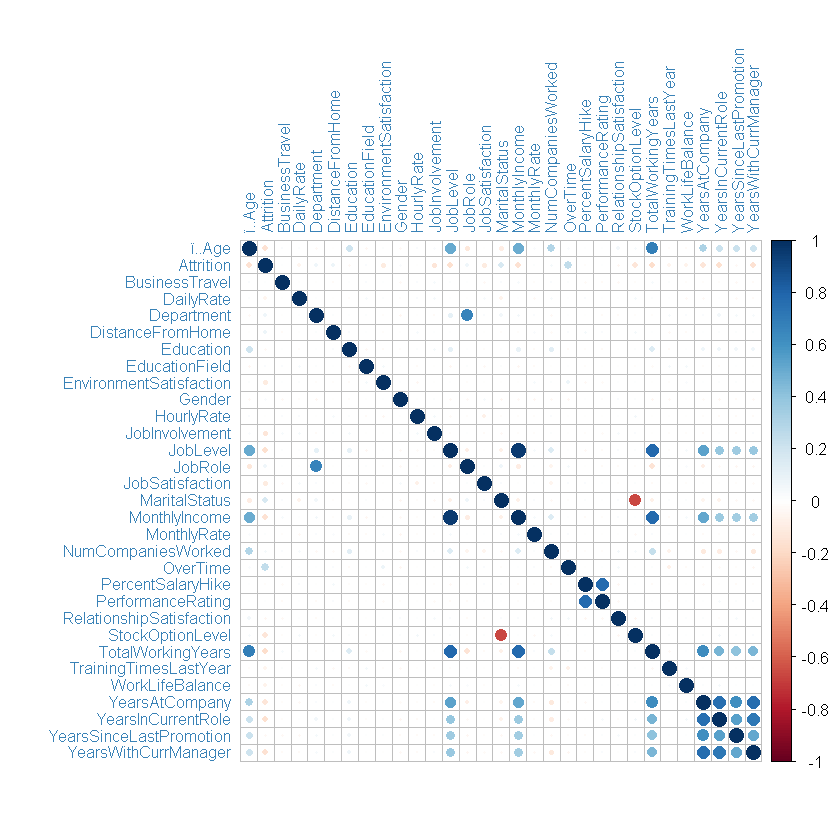

In [6]:
# draw the correlation matrix plot
library(corrplot)
corrplot(cor(d), method = "circle", tl.col = "#3982B7", mar = c(2, 0, 0, 0), tl.cex = 0.8)

- The above correlation matrix displays the linear correlation between every pair of features in the form of dots of varying colors and sizes.
- A larger dot indicates that the correlation between these selected features is stronger, whereas the color denotes the strength of the positive (blue) or negative (red) correlation coefficient.
- This application in Shiny App has an additional functionality: by clicking any element in the correlation matrix, a 2D histogram is displayed in order to better observe the correlation between those features.

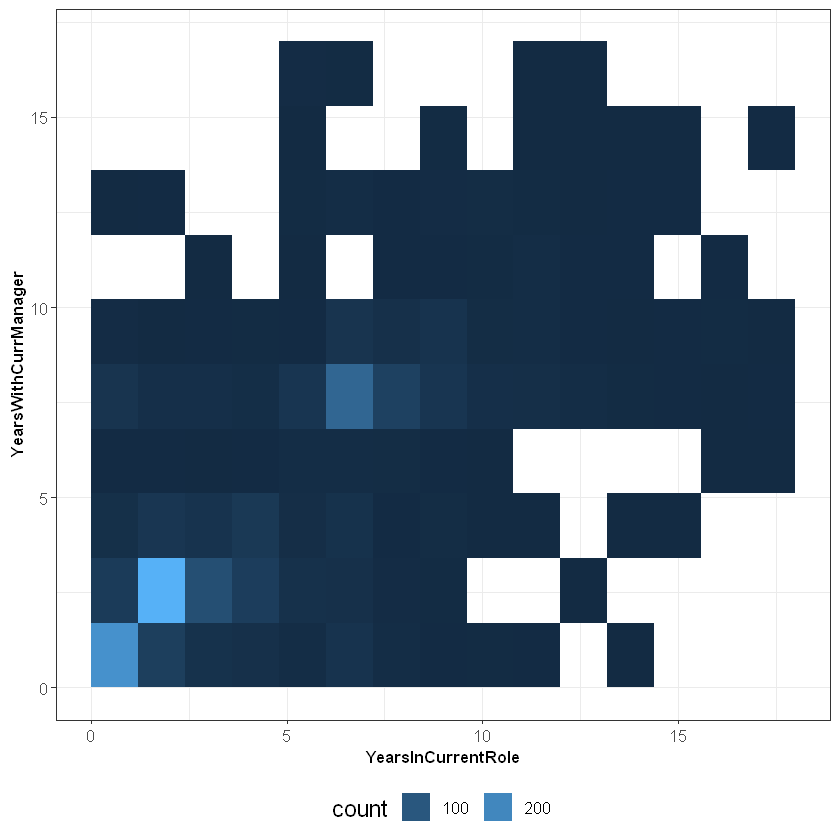

In [7]:
library(ggplot2)

# construct correlation plot using ggplot2 stat_bin2d
ggplot(d, aes(YearsInCurrentRole, YearsWithCurrManager))+ 
stat_bin2d(bins = c(15, 10))+           #set bin numbers
guides(colour = guide_legend(override.aes = list(alpha = 1)),
fill = guide_legend(override.aes = list(alpha = 1)))+
theme_bw()+theme(axis.text=element_text(size=10),
axis.title=element_text(size=10,face="bold"),
legend.text=element_text(size=10),legend.title=element_text(size=14),
legend.position = "bottom")+
xlab("YearsInCurrentRole")+ylab("YearsWithCurrManager")

- Alternatively, clicking the elements along the leading diagonal will output violin plots of the selected features, bucketed by the true underlying attrition value (1 indicating employees that attrite, and 0 indicated those that remain).

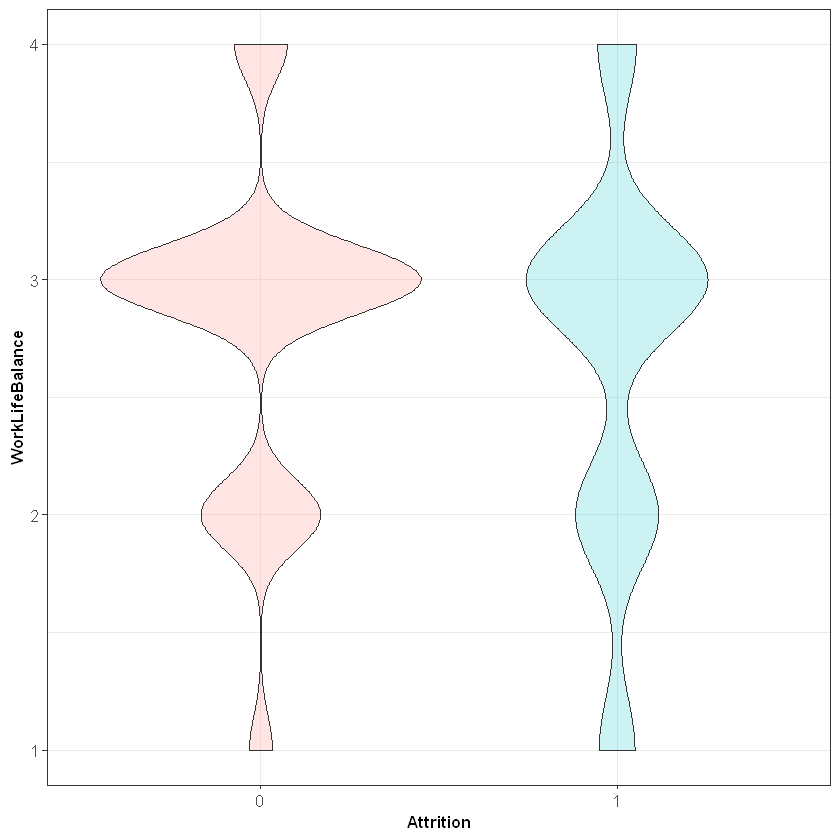

In [8]:
# construct violin plot using ggplot2 geom_violin
ggplot(d, aes(factor(Attrition), WorkLifeBalance))+   
geom_violin(alpha = 0.2, aes(fill = factor(Attrition)))+ 
#set violin plot
theme_bw()+                         #set theme and legend
guides(fill=FALSE)+theme(axis.text=element_text(size=10),
axis.title=element_text(size=10,face="bold"),
legend.text=element_text(size=10),
legend.title=element_text(size=14),legend.position = "bottom")+
xlab("Attrition")   

## Data Preprocessing

In [9]:
# load packages
library("xgboost")
library("e1071")
library("MASS")
library("xtable")

### Data Partitioning

__The data is partitioned into three sets: training, validation and testing:__

- The training set is responsible for initially teaching the model the causal relationship between all information and the attrition probability.
- The validation set is then used to estimate how well the model has been trained and fine tune the parameters to develop the best model.
- Once those two steps have been completed, The completed model is applied to the testing set in order to get accurate results on how the model would perform on real-world data.

In [10]:
# Create data for training and test
set.seed(0)
tr.number<-sample(nrow(d),nrow(d)*2/3)  
# we split whole dataset into 2/3 training data and 1/3 testing data
train<-d[tr.number,]
test<-d[-tr.number,]

column_names = names(test)

# split dataset
train_Y = as.numeric(train$Attrition)
train$Attrition<-NULL
test_Y = test$Attrition
test$Attrition<-NULL

# numericize training and testing data
train[] <- lapply(train, as.numeric)
test[] <- lapply(test, as.numeric)

### Data Modeling with Machine Learning

- XGBoost is a decision tree based algorithm. Multiple trees are ensembled to improve the predictive power of the model.
- SVM is a discriminative classifier that takes labeled training data and constructs a hyperplane to categorize new examples.
- Logistic regression is a simple classifier used to estimate the probability of a binary outcome based on several predictors and a logit function.

#### XGBoost model

- The first model we fit is an extreme gradient boosting (XGBoost) model. For more detail, http://xgboost.readthedocs.io/en/latest/parameter.html.

- Here, we choose maximum depth of tree as 3, step size shrinkage parameter as 0.3, use logistic regression for binary classification with area under the curve(auc) as an evaluation metric for validation data. These default values we have set can be tuned to optimize for accuracy in a true analysis.

In [11]:
# Construct xgb.DMatrix object from training matrix
dtrain <- xgb.DMatrix(as.matrix(train), label = train_Y)

# Create a list of parameters for XGBoost model
param <- list(max_depth=3, 
              silent=1, 
              eta = 0.3,
              objective='binary:logistic',
              eval_metric = 'auc')

# Training a XGBoost model using training dataset and chosen parameters
bst <- xgb.train(param, nrounds = 82, dtrain)

# Predicting the results using testing dataset
pred.xgb <- predict(bst, as.matrix(test))

# Create a table indicating the most important features of XGBoost model
importance <- xgb.importance(feature_names = column_names, model = bst)

- The XGBoost object, bst, created from training the model is a list that contains basic information for the model training, e.g. the parameters settings, etc. The predict step allows us to make a prediction using the separate test dataset.

In [12]:
#We can show the first 5 predictions here as,

head(pred.xgb)
cat("The result shows us the first five predicted probabilities for the test dataset. For example, the first observation’s prediction is", {pred.xgb[1]}, "based on our model, that employee will have a chance to attrite by around",{ceiling(pred.xgb[1]*100)},"%")

[1] 0.68773174 0.20049529 0.02522733 0.02317090 0.98025709 0.07951519

The result shows us the first five predicted probabilities for the test dataset. For example, the first observation’s prediction is 0.6877317 based on our model, that employee will have a chance to attrite by around 69 %

##### Feature Importance
- A great advantage of using XGBoost model is its built-in ability to show us a feature importance table.
- The importance metric provides a score indicating how valuable each factor was in the construction of the boosted decision trees.
- Higher relative importance indicates a larger impact on the algorithm and final prediction.
- To actively improve overall employee retention issues, we can use this to look more closely at the most important features that determine the attrition.
- In the figure below, we visualize the top 10 important features in histogram using metric.

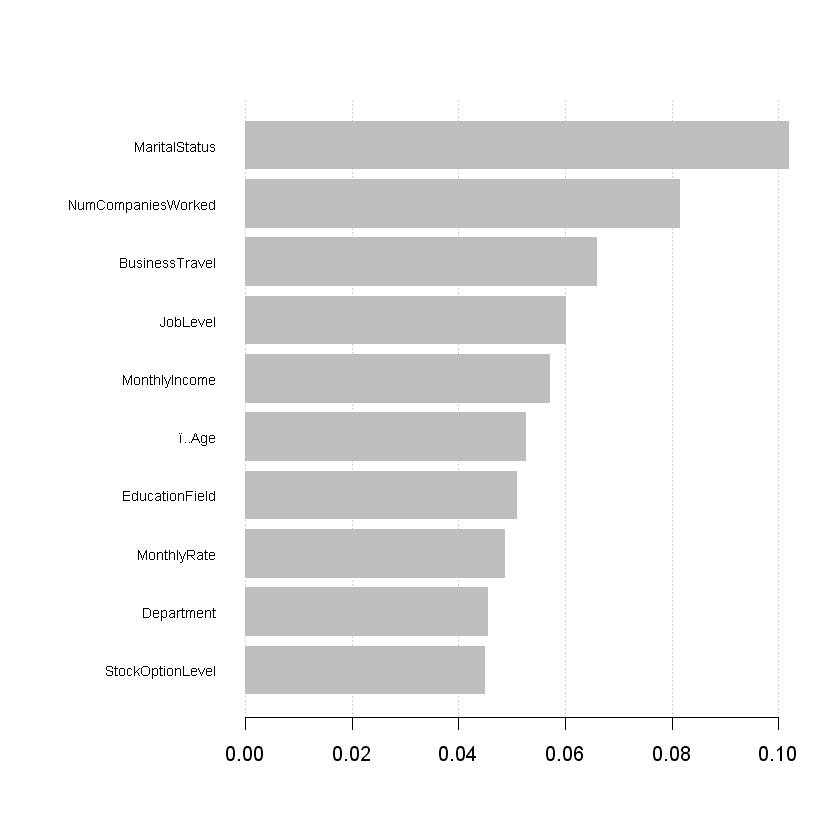

In [13]:
xgb.plot.importance(importance_matrix = importance, top_n = 10)

#### SVM model
- The second model we fit is a support vector machine(SVM) model. Basically, a SVM constructs a hyperplane or a set of hyperplanes that have the largest distance to the nearest training data points of other classes.

- We choose a radial kernel with proper gamma and cost values here to optimize the performance of SVM. Again, these should be tuned in a full analysis.

In [14]:
train$Attrition<-train_Y

# Training a SVM 
svm_model<-svm(Attrition~.,                #set model formula
                type="C-classification",   #set classification machine
                gamma=0.001668101,         #set gamma parameter
                cost=35.93814,             #set cost parameter
                data=train,
                cross=3,                   #3-fold cross validation
                probability = TRUE        #allow for probability prediction
)

# Predicting the results using testing dataset
# Obtain the predicted class 0/1
svm_model.predict<-predict(svm_model, test, probability=TRUE) 

# Obtain the predicted probability for class 0/1
svm_model.prob <-attr(svm_model.predict,"probabilities") 
svm_model


Call:
svm(formula = Attrition ~ ., data = train, type = "C-classification", 
    gamma = 0.001668101, cost = 35.93814, cross = 3, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  35.93814 
      gamma:  0.001668101 

Number of Support Vectors:  342


- The SVM model object is a list presenting basic information about the parameters, number of support vectors, etc.
- The number of support vectors depends on how much slack we allow when training the model.
- If we allow a large amount of flexibility, we will have a large number of support vectors.

#### Logistic regression model

- The third model we fit is a logistic regression model.
- The logit function always generates a predicted value between 0 and 1 that can be interpreted as  a probability.

In [15]:
# Training a logistic regression model
LR_model <- glm(Attrition ~.,family=binomial(link='logit'),data=train)

# Predicting the results using testing dataset
LR_model.predict <- predict(LR_model, test, type = "response")
coef(LR_model)

(Intercept)                   ï..Age           BusinessTravel 
           -8.272882e-01            -2.868197e-02             6.732776e-02 
               DailyRate               Department         DistanceFromHome 
           -3.552768e-04             5.465854e-01             4.282487e-02 
               Education           EducationField  EnvironmentSatisfaction 
            1.841232e-02             9.824066e-02            -4.793673e-01 
                  Gender               HourlyRate           JobInvolvement 
            4.535281e-01            -3.278262e-05            -4.220547e-01 
                JobLevel                  JobRole          JobSatisfaction 
           -6.600504e-01            -6.736794e-02            -3.482584e-01 
           MaritalStatus            MonthlyIncome              MonthlyRate 
            6.059343e-01             3.649747e-06             7.653307e-06 
      NumCompaniesWorked                 OverTime        PercentSalaryHike 
            1.823840e-01             1.864827e+00            -4.075285e-02 
       PerformanceRating RelationshipSatisfaction         StockOptionLevel 
            1.735434e-01            -2.146425e-01            -1.618772e-01 
       TotalWorkingYears    TrainingTimesLastYear          WorkLifeBalance 
           -4.427541e-02            -1.869216e-01            -1.817880e-01 
          YearsAtCompany       YearsInCurrentRole  YearsSinceLastPromotion 
            1.442924e-01            -1.930590e-01             1.587872e-01 
    YearsWithCurrManager 
           -1.477998e-01